In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


# Import Rosbag Data

In [3]:
ls

brake_calibration.ipynb  log_brake_2020-08-13-11-52-40.bag


In [4]:
bag = rosbag.Bag('log_brake_2020-08-13-11-52-40.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'pkg_ta/LogBrakeCommand': '7f3b1ab4918c50642f07c6849a030a08'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/LogBrakeCommand', message_count=1316, connections=1, frequency=20.000686669082725), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=13103, connections=1, frequency=195.57055929872007)})

In [5]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_1 = np.array(list_t_header)
list_t_header_1 -= list_t_header_1[0]

dt = list_t[1:] - list_t[:-1]
dt_header_1 = list_t_header_1[1:] - list_t_header_1[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_1 = savgol_filter(np.array(list_t_header), 101, 3)

'''
steering_setpoint_1 = np.array(list_steering_setpoint)
steering_delta_1 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_1 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_1 = savgol_filter(np.gradient(steering_angle_1, list_t_header_1), 101, 3)
'''

'\nsteering_setpoint_1 = np.array(list_steering_setpoint)\nsteering_delta_1 = savgol_filter(np.array(list_steering_delta), 101, 3)\nsteering_angle_1 = savgol_filter(np.array(list_steering_angle), 101, 3)\n#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)\nw_filtered_header_1 = savgol_filter(np.gradient(steering_angle_1, list_t_header_1), 101, 3)\n'

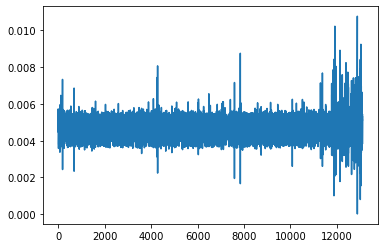

In [11]:
plt.plot(dt)

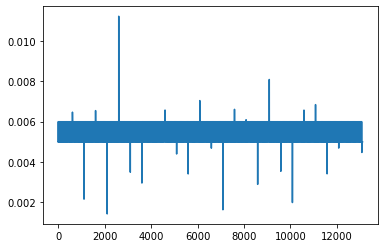

In [12]:
plt.plot(dt_header_1)

In [6]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_1 = np.array(list_t_header)
list_t_header_1 -= list_t_header_1[0]

dt = list_t[1:] - list_t[:-1]
dt_header_1 = list_t_header_1[1:] - list_t_header_1[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_1 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_1 = np.array(list_steering_setpoint)
steering_delta_1 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_1 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_1 = savgol_filter(np.gradient(steering_angle_1, list_t_header_1), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.020076608906189602
std: 0.0003661912808192731



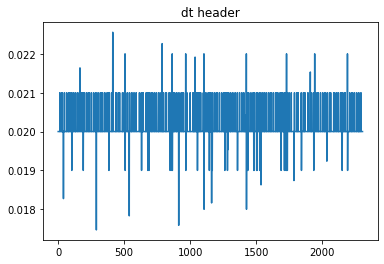

In [7]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_1)))
print('std: {}'.format(np.std(dt_header_1)))
print('')

plt.plot(dt_header_1)
plt.title("dt header")
plt.show()

In [8]:
idx_1 = np.where(np.abs(steering_setpoint_1[1:] - steering_setpoint_1[:-1]) >= 1)[0]
idx_1 = [idx_1[0], -1]#idx_1[-1] + 500]

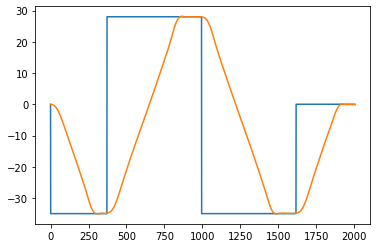

In [9]:
plt.plot(steering_setpoint_1[idx_1[0]:idx_1[1]])
plt.plot(steering_angle_1[idx_1[0]:idx_1[1]])

# Dua Orang Lantai Licin

## Import Data

In [10]:
bag = rosbag.Bag('log_steer_dua_orang_lantai_licin_2020-08-12-20-06-32.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=908, connections=1, frequency=20.000782043517862), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2264, connections=1, frequency=49.6531868548158)})

In [11]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_2 = np.array(list_t_header)
list_t_header_2 -= list_t_header_2[0]

dt = list_t[1:] - list_t[:-1]
dt_header_2 = list_t_header_2[1:] - list_t_header_2[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_2 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_2 = np.array(list_steering_setpoint)
steering_delta_2 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_2 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_2 = savgol_filter(np.gradient(steering_angle_2, list_t_header_2), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.02006417104642685
std: 0.0003415855755810096



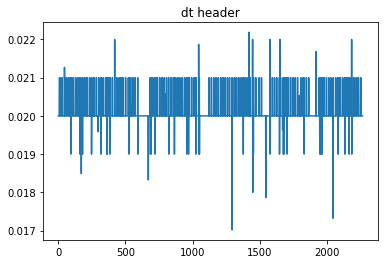

In [12]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_2)))
print('std: {}'.format(np.std(dt_header_2)))
print('')

plt.plot(dt_header_2)
plt.title("dt header")
plt.show()

In [13]:
idx_2 = np.where(np.abs(steering_setpoint_2[1:] - steering_setpoint_2[:-1]) >= 1)[0]
idx_2 = [idx_2[0], -1]#idx_2[-1] + 500]

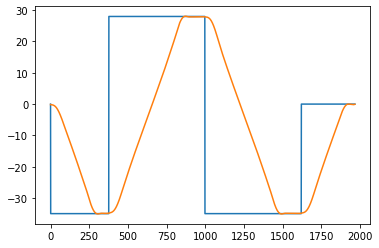

In [14]:
plt.plot(steering_setpoint_2[idx_2[0]:idx_2[1]])
plt.plot(steering_angle_2[idx_2[0]:idx_2[1]])

# Analisis dan PLOT

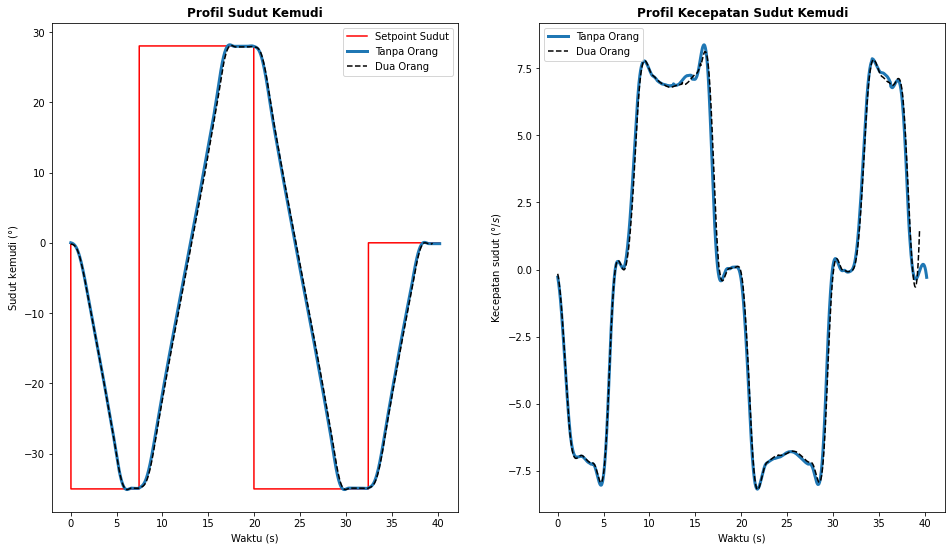

In [15]:
scale = 1.
plt.figure(figsize=(16*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,2,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()

# Plot the steering angle
plt.subplot(1,2,2)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()

plt.savefig('kalibrasi_absolute_encoder.png', dpi=600, transparent=True)
plt.show()